In [ ]:
from heapq import heappush, heappop
from collections import Counter

class Node:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right
    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freq_map):
    heap = [Node(freq, sym) for sym, freq in freq_map.items()]
    if len(heap) == 1:  # edge case: single symbol
        return heap[0]
    while len(heap) > 1:
        n1 = heappop(heap)
        n2 = heappop(heap)
        merged = Node(n1.freq + n2.freq, None, n1, n2)
        heappush(heap, merged)
    return heap[0]

def generate_codes(node, prefix="", codebook={}):
    if node is None:
        return
    if node.symbol is not None:
        codebook[node.symbol] = prefix
    generate_codes(node.left, prefix + "0", codebook)
    generate_codes(node.right, prefix + "1", codebook)
    return codebook

def huffman_encode(data):
    freq_map = Counter(data)
    # print(f"Frequencies: {freq_map}")
    root = build_huffman_tree(freq_map)
    codebook = generate_codes(root)
    encoded_data = ''.join(codebook[byte] for byte in data)
    return encoded_data, codebook


In [11]:

import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
def analyze_image(filepath):
    print(f"\n🔹 Processing: {os.path.basename(filepath)}")
    
    # Load and convert to RGB
    img = cv.imread(filepath)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    data = img.flatten().tolist()  # raw bytes of pixels

    # Huffman encoding
    encoded, codebook = huffman_encode(data)

    original_bits = len(data) * 8
    compressed_bits = len(encoded)
    compression_ratio = original_bits / compressed_bits if compressed_bits > 0 else 1

    print(f"Original size: {original_bits/8:.2f} bytes")
    print(f"Compressed size: {compressed_bits/8:.2f} bytes (approx.)")
    print(f"Compression ratio: {compression_ratio:.2f}x")

    # Show the image
    plt.imshow(img)
    plt.title(f"Original Image: {os.path.basename(filepath)}")
    plt.axis("off")
    plt.show()


🔹 Processing: person_image.jpg
Frequencies: Counter({0: 32260092, 1: 2188134, 2: 1178187, 3: 903009, 4: 730968, 5: 643731, 6: 577818, 7: 537927, 8: 506751, 11: 495084, 10: 494289, 9: 493560, 12: 488778, 13: 480873, 14: 463083, 15: 453153, 16: 448650, 17: 444183, 18: 442992, 19: 432867, 20: 422928, 21: 411747, 22: 402162, 23: 398703, 24: 391482, 25: 383973, 26: 371940, 27: 355842, 28: 340080, 29: 332154, 30: 324768, 31: 318561, 32: 314391, 33: 307524, 34: 297132, 35: 289005, 36: 278997, 37: 269709, 38: 261729, 39: 254946, 40: 249390, 41: 245388, 42: 239487, 43: 231552, 44: 224499, 45: 219384, 46: 212493, 47: 207444, 48: 202752, 49: 199224, 50: 195912, 51: 192183, 52: 188079, 53: 181794, 54: 175101, 55: 169968, 56: 162423, 57: 157551, 58: 154026, 59: 149511, 60: 144294, 61: 141417, 62: 137202, 63: 134058, 64: 130866, 65: 126885, 66: 124023, 67: 121374, 68: 117462, 69: 115506, 70: 112452, 71: 109416, 72: 106380, 73: 105192, 74: 104598, 76: 102249, 75: 101991, 101: 101283, 103: 101211, 10

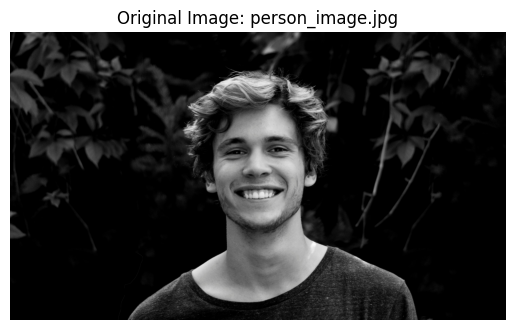

In [12]:
path =os.getcwd()
paths = path.split("/")
paths[-2]= 'image'
paths[-1]= 'person_image.jpg'
image_path1= "/".join(paths)
paths[-1]= 'nature_image.jpg'
image_path2= "/".join(paths)

analyze_image(image_path1)

